# <center> Project 02: Classification </center>

## <center> Python tutorial </center>

This is a complementary tutorial with the methods and functions that you will need to use for successfully solve the project. You can use it as a knowledge base during the course together with the first tutorial and the P01 tutorial.

First we will import the necessary libraries. Note that you will need to install new libraries, such as `scipy`. You can use `pip` or `conda` to install them.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Filtering null values in Pandas (v2)

In the P01 tutorials we learnt how to filter null values. However, pandas has a function `dropna()` to simply eliminate null values

In [3]:
# We create an example dataframe. note tha there are different empty values as np.nan
df = pd.DataFrame({'age': [5, 6, np.NaN, 6, 7, 23 , 4 , 12 , 4 ,12],
                    'born': [pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25'), pd.Timestamp('1930-09-09'), 
                             pd.NaT, pd.NaT, pd.Timestamp('1945-03-15'), pd.Timestamp('1910-10-25'),
                            pd.Timestamp('1966-10-11'), pd.Timestamp('1923-02-12')],
                    'name': ['Alfred', 'Batman', 'Joker','Pinocchio', 'Catwoman', 'Superman', 'Ironman',
                             'Spider-Man', 'Aquaman', 'Science Boy'],
                    'toy': [np.NaN, 'Batmobile', 'Smile', 'Woodstick', 'Miau!', np.NaN, 'Jarvis', 'Spider', 'Fish', 'Journal']})
df.head()

,age,born,name,toy
0,5.0,NaT,Alfred,NaN
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,Joker,Smile
3,6.0,1930-09-09,Pinocchio,Woodstick
4,7.0,NaT,Catwoman,Miau!


As you may notice, the `head()` function only returns the first five rows of a dataset. You may have a dataset of hundreds or thousands of rows. In case you want to explore the last rows, instead of the first five, you can use `tail()`.

In [4]:
df.tail()

,age,born,name,toy
5,23.0,NaT,Superman,NaN
6,4.0,1945-03-15,Ironman,Jarvis
7,12.0,1910-10-25,Spider-Man,Spider
8,4.0,1966-10-11,Aquaman,Fish
9,12.0,1923-02-12,Science Boy,Journal


Now, let's proceed to delete the null values

In [5]:
df.dropna() 

,age,born,name,toy
1,6.0,1939-05-27,Batman,Batmobile
3,6.0,1930-09-09,Pinocchio,Woodstick
6,4.0,1945-03-15,Ironman,Jarvis
7,12.0,1910-10-25,Spider-Man,Spider
8,4.0,1966-10-11,Aquaman,Fish
9,12.0,1923-02-12,Science Boy,Journal


By default, `dropna()` eliminates all the rows that has empty values. However, if you want to eliminate columns instead of rows, you can use the `axis` parameter. 

In [6]:
# Notice that after using the function, `df` remains the same, 
# so if you want to save the values you have to create o re-use a variable. 

df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Joker
3,Pinocchio
4,Catwoman
5,Superman
6,Ironman
7,Spider-Man
8,Aquaman
9,Science Boy


Additionally, you can set if the rows or columns are eliminated only when all the values matches NaN or only some of them, by using the `how` parameter. You can see more about how to use it in the documentation for [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [7]:
del df

## Counting lengths 

If you have groups, Series or an Index from a DataFrame, you can count how many values you have inside by using `value_counts()`.

In [25]:
index = pd.Index([3, 1, 2, 3, 4, np.nan])
index.value_counts()

3.0    2
4.0    1
2.0    1
1.0    1
dtype: int64

By default `value_counts()` does not include NaN values, so you can use a parameter to include them.

In [9]:
index.value_counts(dropna=False)

3.0    2
NaN    1
4.0    1
2.0    1
1.0    1
dtype: int64

In [10]:
del index

## Creating a boxplot

We used `matplotlib` to plot different kind of graphics. A boxplot is really useful when you want to visualize the standard deviation and to spot outliers in a dataset. 

In [11]:
#First, create new datasets
np.random.seed(10)
c1 = np.random.normal(100, 10, 200)
c2 = np.random.normal(80, 30, 200)
c1, c2

(array([113.31586504, 107.15278974,  84.54599708,  99.9161615 ,
        106.21335974,  92.79914439, 102.65511586, 101.08548526,
        100.04291431,  98.25399789, 104.3302619 , 112.03037374,
         90.34934329, 110.28274078, 102.2863013 , 104.45137613,
         88.63397788, 101.35136878, 114.84537002,  89.20195114,
         80.22271719,  82.56627704, 102.66070164, 123.84967331,
        111.23691253, 116.72622213, 100.99149216, 113.97996377,
         97.28752012, 106.13204185,  97.32682811,  94.50690986,
        101.32708296,  95.23857985, 113.08473081, 101.95013279,
        104.00209988,  96.62367663, 112.56472264,  92.68030498,
        106.60231551,  96.49128109,  90.6056664 ,  95.10662783,
         91.95408858,  97.87302361,  96.60859754, 103.12169936,
        105.6515267 ,  98.52579742,  99.74094663, 102.89094204,
         94.60120929, 107.0816002 , 108.42224738, 102.03580797,
        123.94703665, 109.17458938,  98.87727529,  96.37819553,
         97.67817744,  94.982711  , 111.

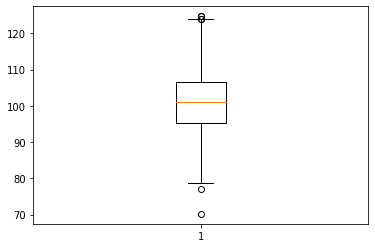

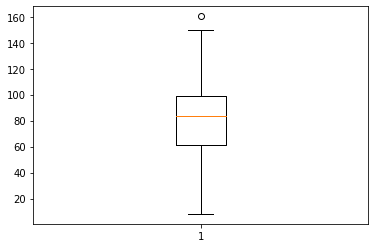

In [12]:
fig1, ax1 = pyplot.subplots()
ax1.boxplot(c1)

fig2, ax2 = pyplot.subplots()
ax2.boxplot(c2)
pyplot.show()

## Label encoding

The [label_encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function allows to prepare the data for training. Encode target labels with value between 0 and n_classes-1. 

LabelEncoder can be used to normalize labels. And can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [13]:
# Importing a dataFrame to play with
titanic = sns.load_dataset("titanic")
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [14]:
# We will use the age as an example,
# let's see the unique values
titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [15]:
# let's delet the empty values
t = titanic.embark_town.dropna()

In [16]:
le = LabelEncoder()
le.fit_transform(t)
le.classes_ # The method classes_ holds the label for each class.

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

Like other preprocessing methods, you can use `fit` and `transform` functions separately. 

## Splitting the dataset

Once you have your dataset clean and your labels are correctly encoded, you can split your dataset into different groups in order to test the result of the training. The [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function split arrays or matrices into random train and test subsets.

In [17]:
# Here we will use the column survived from the titanic dataset to do a binary classification.
# From the dataset, we will only select the numerical varibles to simplify the example.
cols = ['survived', 'pclass', 'age', 'fare']
t = titanic[cols].dropna()

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(t, t['survived'], test_size = 0.2, random_state = 0)
# You can specify the test_size and the train_size as fractions (from 0.0 to 1.0)
# The random_state receives an int that will act as the seed for the random number generator during the split
len(yTrain) #You can check how many elements are in each group

571

You can visualize the balance of the split by generating an histogram with `hist()`.

(array([345.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

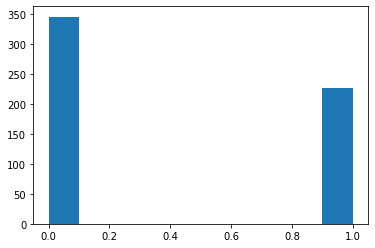

In [19]:
plt.hist(yTrain)

## Using Classifiers

In the P01 you will need to use different classifiers from the `sklearn` package. We will show you how to use them. As you will see the way that they are used are very similar between them. You have a comparison of classifiers in the [Sklearn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). 


In [20]:
#### --- Support Vector Classification ==> SVC()
model_SVC = SVC() #Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(xTrain, yTrain) #Train the model with the training samples: X_train and y_train
y_pred_SVC=model_SVC.predict(xTest) #Test the trained model with test samples
result_SVC=model_SVC.score(xTest, yTest) #Print the score of the trained model
print("SVC Accuracy:", result_SVC)

#### --- Decission Tree Classifier ==> DecisionTreeClassifier()
model_DT = DecisionTreeClassifier()
model_DT.fit(xTrain, yTrain)
y_pred_DT=model_DT.predict(xTest)
result_DT=model_DT.score(xTest, yTest)
print("DT Accuracy:", result_DT)

#### --- Gaussian Naive Bayes ==>
model_NB = GaussianNB()
model_NB.fit(xTrain, yTrain)
y_pred_NB=model_NB.predict(xTest)
result_NB=model_NB.score(xTest, yTest)
print("NB Accuracy:", result_NB)

SVC Accuracy: 0.6573426573426573
DT Accuracy: 1.0
NB Accuracy: 1.0


## Sklearn Metrics

Apart from the accuracy score from each classifier, we have different tools to evaluate them. As you will see at the P02, accuracy is not the only metrics that matters in Machine Learning.

In this example we will use only the SVM example, but you can try the metrics with the other classification methods to compare them.

### Confusion Matrix

The first of the two metrics that we will use for analyse classification methods is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). 
It is used for evaluating the accuracy of the classification. In binary classification, it can help to spot the true positives, true negatives, false positives and false negatives. 

In [21]:
confusion_matrix(yTest, y_pred_SVC) #The inputs are the test dataset and the predicted from the classifier. 

array([[69, 10],
       [39, 25]], dtype=int64)

### Classification Report

Classification report is used to evaluate a model’s predictive power. It is one of the most critical step in machine learning. After you have trained and fitted your machine learning model it is important to evaluate the model’s performance.

One way to do this is by using sklearn’s [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).  It returns four important values: Precision, Recall, F1-score and Support.

In [22]:
print(classification_report(yTest,y_pred_SVC))

precision    recall  f1-score   support

           0       0.64      0.87      0.74        79
           1       0.71      0.39      0.51        64

    accuracy                           0.66       143
   macro avg       0.68      0.63      0.62       143
weighted avg       0.67      0.66      0.63       143



You can see here that on average the model has predicted 68% of the classification correctly.

For Class 0 it has predicted 64% of the test data correctly.

Classification_report is also useful when comparing two models with different specifications against each other and determining which model is better to use. 

## Model comparison and validation

In order to compare the performance of different models, it is possible to use Sklearn's [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) suite. Here you may use an iterative approach to test each model and compare them afterwards. 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

In [23]:
#Models definition
models=[]
models.append(('SVM', SVC()))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('Decision_trees', DecisionTreeClassifier()))
#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=8, random_state=10)
    cv_results=cross_val_score(model, xTrain, yTrain, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())

Model SVM with accuracy (mean): 0.6814113849765258 and accuracy (std): 0.04524121149711485
Model Naive_Bayes with accuracy (mean): 1.0 and accuracy (std): 0.0
Model Decision_trees with accuracy (mean): 1.0 and accuracy (std): 0.0


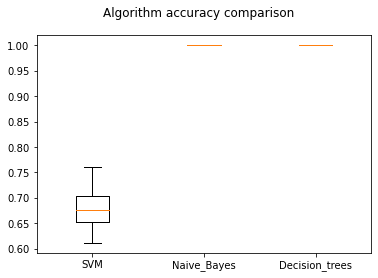

In [24]:
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

As you can compare, SVM is very inefficient in our accuracy comparison. If the situation were different, we can refine and improve our models in different ways. That will be the purpose of the Project 2. So, let's ahead! 